# Getting started

As LOCO uses the [COCO API](https://cocodataset.org/#format-data), we can use [pycocotools](https://github.com/cocodataset/cocoapi) to handle data and annotations.

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
anns = "annotations/loco-all-v2.json"

In [3]:
coco=COCO(anns)

loading annotations into memory...
Done (t=0.96s)
creating index...
index created!


In [4]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms[:-5])))
print('LOCO categories: \n{}\n'.format(' '.join(nms[-5:])))

nms = set([cat['supercategory'] for cat in cats])
print('Supercategories: \n{}'.format(' '.join(nms)))


COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

LOCO categories: 
small load carrier forklift pallet stillage pallet truck

Supercategories: 
animal accessory vehicle electronic kitchen appliance indoor person food furniture logistics outdoor sports


In [5]:
catIds = coco.getCatIds(catNms=cats);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [604123]) # Ids start at 600,001
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

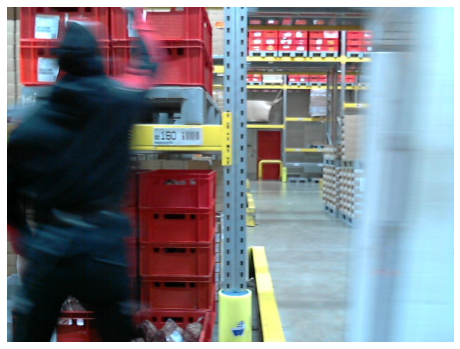

In [6]:
# use path to load image
I = io.imread(img['path'])
plt.axis('off')
plt.imshow(I)
plt.show()

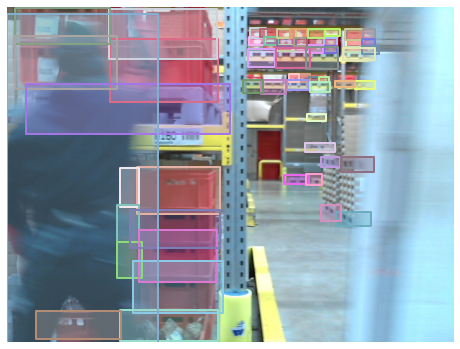

In [7]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)